# Predicting customers who have churned

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv')

In [3]:
# Dropping the last two columns and the client number column
df = df.iloc[:,1:-2]

# Checking for the number of null values in each feature
round((df.isnull().sum() * 100)/(df.shape[0]),2)

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

In [4]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

# Data Exploration

## Exploring Categorical Features

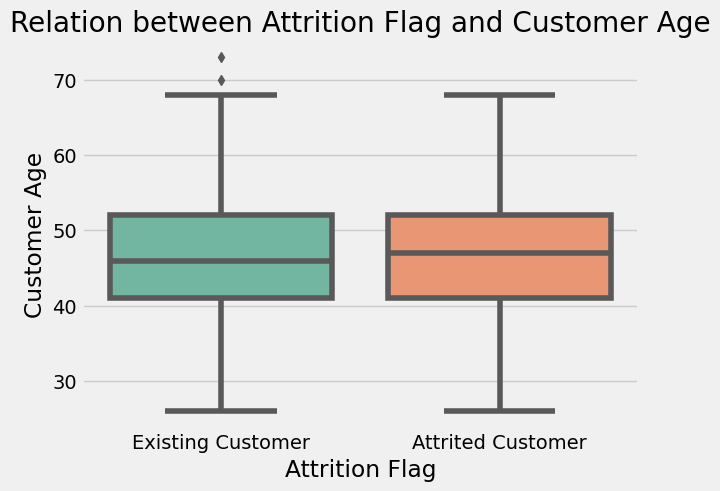

In [5]:
# Box plot to visualize the distribution of Customer Age for each Attrition Flag
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=df, palette='Set2')

plt.xlabel('Attrition Flag')
plt.ylabel('Customer Age')
plt.title('Relation between Attrition Flag and Customer Age')

# Show the plot
plt.show()

We can see from the plot that the range of distrubution for the Customers age is similar for both cases.

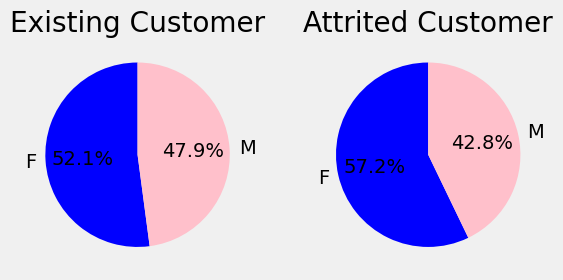

In [6]:
# Count the occurrences of each combination of Attrition_Flag and Gender
count_df = df.groupby(['Attrition_Flag', 'Gender']).size().unstack(fill_value=0)

# Plotting pie charts for each Attrition_Flag category
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

# Plot for Existing Customer
axes[0].pie(count_df.loc['Existing Customer'], labels=count_df.columns, autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'])
axes[0].set_title('Existing Customer')

# Plot for Attrited Customer
axes[1].pie(count_df.loc['Attrited Customer'], labels=count_df.columns, autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'])
axes[1].set_title('Attrited Customer')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The Attrited customer has a higher chance of being a woman

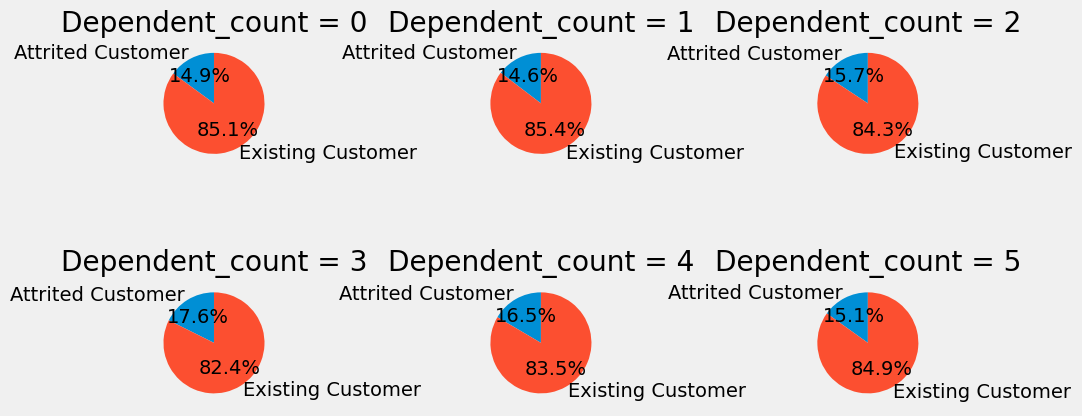

In [7]:
# Dependent_count is the column for number of family members
# Count the occurrences of each combination of Attrition_Flag and Dependent_count
count_df = df.groupby(['Attrition_Flag', 'Dependent_count']).size().unstack(fill_value=0)

# Get unique values of Dependent_count
unique_dependent_counts = sorted(df['Dependent_count'].unique())

# Plot pie charts for each unique Dependent_count value
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

for i, count_value in enumerate(unique_dependent_counts):
    row_index, col_index = divmod(i, 3)
    axes[row_index, col_index].pie(count_df[count_value], labels=count_df.index, autopct='%1.1f%%', startangle=90)
    axes[row_index, col_index].set_title(f'Dependent_count = {count_value}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

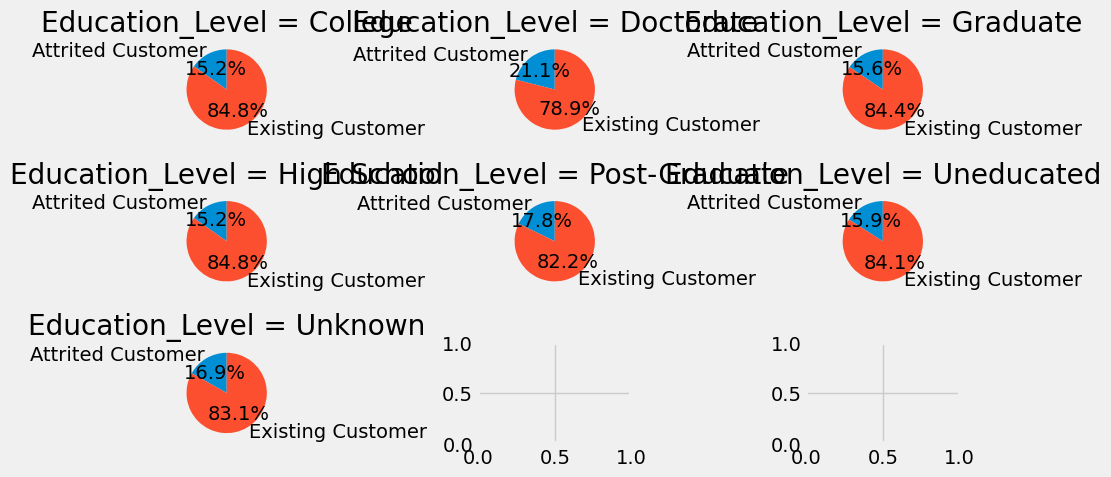

In [8]:
# Dependent_count is the column for number of family members
# Count the occurrences of each combination of Attrition_Flag and Dependent_count
count_df = df.groupby(['Attrition_Flag', 'Education_Level']).size().unstack(fill_value=0)

# Get unique values of Dependent_count
unique_dependent_counts = sorted(df['Education_Level'].unique())

# Plot pie charts for each unique Dependent_count value
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 5))

for i, count_value in enumerate(unique_dependent_counts):
    row_index, col_index = divmod(i, 3)
    axes[row_index, col_index].pie(count_df[count_value], labels=count_df.index, autopct='%1.1f%%', startangle=90)
    axes[row_index, col_index].set_title(f'Education_Level = {count_value}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()